In [3]:
# Import package
import json
import tweepy
import myCredentials as my
from tweepy import StreamListener
from tweepy import Stream
from tweepy import Cursor

In [4]:
# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(my.consumer_key, my.consumer_secret)
auth.set_access_token(my.access_token, my.access_token_secret)

#api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [257]:
##public_tweets = api.home_timeline()
query = "corona"+" -filter:retweets"
search = Cursor(api.search, q = query, lang = 'en'). items(100)

In [256]:
x = search.next()
print(x.text, x.entities)
#You can find the url in the tweets in the entities.url
dir(x)

StopIteration: 

In [235]:
print(x)

Status(_api=<tweepy.api.API object at 0x7f78f03b5550>, _json={'created_at': 'Tue Jan 05 22:55:14 +0000 2021', 'id': 1346591112362938375, 'id_str': '1346591112362938375', 'text': 'How does the rest of the world react to the news of a magical Queen? Arendelle &amp; Corona are both full of magic. Doe… https://t.co/coYNhPEfEB', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/coYNhPEfEB', 'expanded_url': 'https://twitter.com/i/web/status/1346591112362938375', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [121, 144]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': 1346591109766651908, 'in_reply_to_status_id_str': '1346591109766651908', 'in_reply_to_user_id': 357711689, 'in_reply_to_user_id_str': '357711689', 'in_reply_to_screen_name': 'audreyrkl', 'user': {'id': 357711689, 'id_str': '35

In [186]:
print(x.user)
dir(x.user)

User(_api=<tweepy.api.API object at 0x7f78f03b5550>, _json={'id': 25601252, 'id_str': '25601252', 'name': 'Mofo', 'screen_name': 'mofowear', 'location': 'California', 'description': '"Americano Sinner" "Mexican American Patriot" "Retired Bouncer" "Commentator" Hosto con El Mosto of @ChicanosPodcast & Americano Sinner https://t.co/k2M6KlZp1L', 'url': 'http://t.co/rIVDqAxEmg', 'entities': {'url': {'urls': [{'url': 'http://t.co/rIVDqAxEmg', 'expanded_url': 'http://www.mofowearstore.com', 'display_url': 'mofowearstore.com', 'indices': [0, 22]}]}, 'description': {'urls': [{'url': 'https://t.co/k2M6KlZp1L', 'expanded_url': 'http://instagram.com/mofowear', 'display_url': 'instagram.com/mofowear', 'indices': [136, 159]}]}}, 'protected': False, 'followers_count': 2655, 'friends_count': 978, 'listed_count': 160, 'created_at': 'Fri Mar 20 23:44:25 +0000 2009', 'favourites_count': 2407, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 61814, 'lang':

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'contributors_enabled',
 'created_at',
 'default_profile',
 'default_profile_image',
 'description',
 'entities',
 'favourites_count',
 'follow',
 'follow_request_sent',
 'followers',
 'followers_count',
 'followers_ids',
 'following',
 'friends',
 'friends_count',
 'geo_enabled',
 'has_extended_profile',
 'id',
 'id_str',
 'is_translation_enabled',
 'is_translator',
 'lang',
 'listed_count',
 'lists',
 'lists_memberships',
 'lists_subscriptions',
 'location',
 'name',
 'notifications',
 'parse',
 'parse_list',
 'profile_background_color',
 'profile_background_image_url',
 'profile_back

In [258]:
import pandas as pd
from pandas import DataFrame
list_of_dicts = []
user_mention = []
for tweet in search:
    is_sensitive = tweet.possibly_sensitive if hasattr(tweet, 'possibly_sensitive') else ""
    url = "" if DataFrame.from_dict(tweet.entities['urls']).empty else DataFrame.from_dict(tweet.entities['urls']).url[0]
    list_of_dicts.append({'tweet_id':tweet.id, 'tweet' :tweet.text, 'created_at':tweet.created_at,
                         'url' : url, 'friends_count': tweet.user.friends_count, 
                         'followers_count':tweet.user.followers_count, "is_sensitive": is_sensitive})
    for mention in tweet.entities['user_mentions']:
        user_mention.append({'tweet_id': tweet.id,'mentioned_user_name':mention['screen_name'],
                             'mentioned_name':mention['name']})

list_of_dicts

[{'tweet_id': 1346594464924639236,
  'tweet': 'Imma need corona to pack it up!! Like you had a year enough already',
  'created_at': datetime.datetime(2021, 1, 5, 23, 8, 33),
  'url': '',
  'friends_count': 257,
  'followers_count': 142,
  'is_sensitive': ''},
 {'tweet_id': 1346594414546669568,
  'tweet': 'Socially-distanced author reading in time of Corona. She Was the Kind of Person That Keeps a Parrot. Part Three Kāl… https://t.co/q7FZKDTJ6w',
  'created_at': datetime.datetime(2021, 1, 5, 23, 8, 21),
  'url': 'https://t.co/q7FZKDTJ6w',
  'friends_count': 101,
  'followers_count': 1986,
  'is_sensitive': False},
 {'tweet_id': 1346594412265168898,
  'tweet': '@realDonaldTrump @senatemajldr @JohnCornyn @SenJohnThune I have for 2021 2 wishes:\n* let CORONA be just a beer agai… https://t.co/8edY4v1ME6',
  'created_at': datetime.datetime(2021, 1, 5, 23, 8, 21),
  'url': 'https://t.co/8edY4v1ME6',
  'friends_count': 9,
  'followers_count': 1,
  'is_sensitive': ''},
 {'tweet_id': 1346594356

In [260]:
df= DataFrame.from_dict(list_of_dicts)
p = DataFrame.from_dict(user_mention)
p

,tweet_id,mentioned_user_name,mentioned_name
0,1346594412265168898,realDonaldTrump,Donald J. Trump
1,1346594412265168898,senatemajldr,Leader McConnell
2,1346594412265168898,JohnCornyn,Senator John Cornyn
3,1346594412265168898,SenJohnThune,Senator John Thune
4,1346594315351564289,kleinjuIia,юлия(gordon love acc)
...,...,...,...
68,1346592559234232320,BBCNewsnight,BBC Newsnight
69,1346592559234232320,lewis_goodall,Lewis Goodall
70,1346592559234232320,lewis_goodall,Lewis Goodall
71,1346592555937525765,Jennyflower,Jen 🐇😷


In [225]:
df["is_sensitive"] == True

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: is_sensitive, Length: 100, dtype: bool

In [6]:
from nltk import bigrams
import nltk
import itertools, collections
from nltk.corpus import stopwords

# Download stopwords
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
#textblob
list_of_splitted_tweets = [tweet.replace("!","").lower().split() for tweet in df.tweet]

query_words = ["covid-19", "covid",'''separate query stop words from others''' "could", "got", "like", "&amp;", "-", "|"]
stop_words.update(query_words)
stop_words

[nltk_data] Downloading package stopwords to /home/melike/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'&amp;',
 '-',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'covid',
 'covid-19',
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'got',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'like',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'o

In [7]:
words_cleaned =  [[word for word in tweets if not word in stop_words]
                 for tweets in list_of_splitted_tweets]


In [8]:
# Flatten list of words in clean tweets
all_words = list(itertools.chain(*words_cleaned))
all_words

['think',
 'day',
 'corona',
 'over,',
 'curfew,',
 'hugging',
 'kissing',
 'strangers.',
 'feeling',
 'underrated.',
 '@poggers67500932',
 '@shoe0nhead',
 'corona',
 'powerful',
 'going',
 'mrna',
 'vaccine',
 'to…',
 'https://t.co/ogtuuh8dmb',
 '@paamericangirl',
 '@governortomwolf',
 '@realdonaldtrump',
 'know',
 'calling',
 'everything',
 'corona.',
 'seen',
 'any…',
 'https://t.co/qnck9h9mwc',
 'rat',
 'worse',
 'corona',
 'virus,',
 'needs',
 'bullet',
 'https://t.co/8eljpvvkqk',
 '@foone',
 'corona',
 'deniers',
 'used',
 'study',
 'showed',
 'led',
 'uv',
 'effective',
 'corona',
 'virus.',
 'unde…',
 'https://t.co/3twne3so8d',
 '@ambkcsingh',
 '@bainjal',
 '@pfizer',
 'hope',
 'getting',
 'official',
 'approval',
 'dcgi',
 '2',
 'corona',
 'vaccines,our',
 'indian',
 'ce…',
 'https://t.co/rbvtukwpn2',
 '@drrpnishank',
 'sir',
 '....',
 'itna',
 'jhdaa',
 'thand',
 'ho',
 'rhi',
 'h',
 'bht',
 'jhdaa',
 'aur',
 'corona',
 'se',
 'hone',
 'ke',
 'chances',
 'bht',
 'h',
 'tab',


[68, 8, 7, 7, 7, 6, 5, 5, 5, 5]


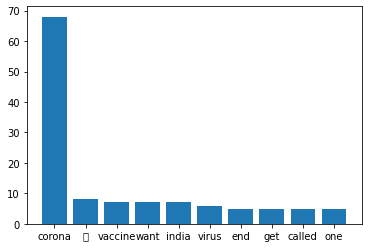

In [51]:
# Import packages
import matplotlib.pyplot as plt
# Most common words
word_counts = collections.Counter(all_words)
mc = word_counts.most_common(10)
x=  [i[0] for i in mc]
y = [i[1] for i in mc]
print(y)
fig, ax = plt.subplots()
plt.bar(x,y)
fig.savefig('my_plot.png')

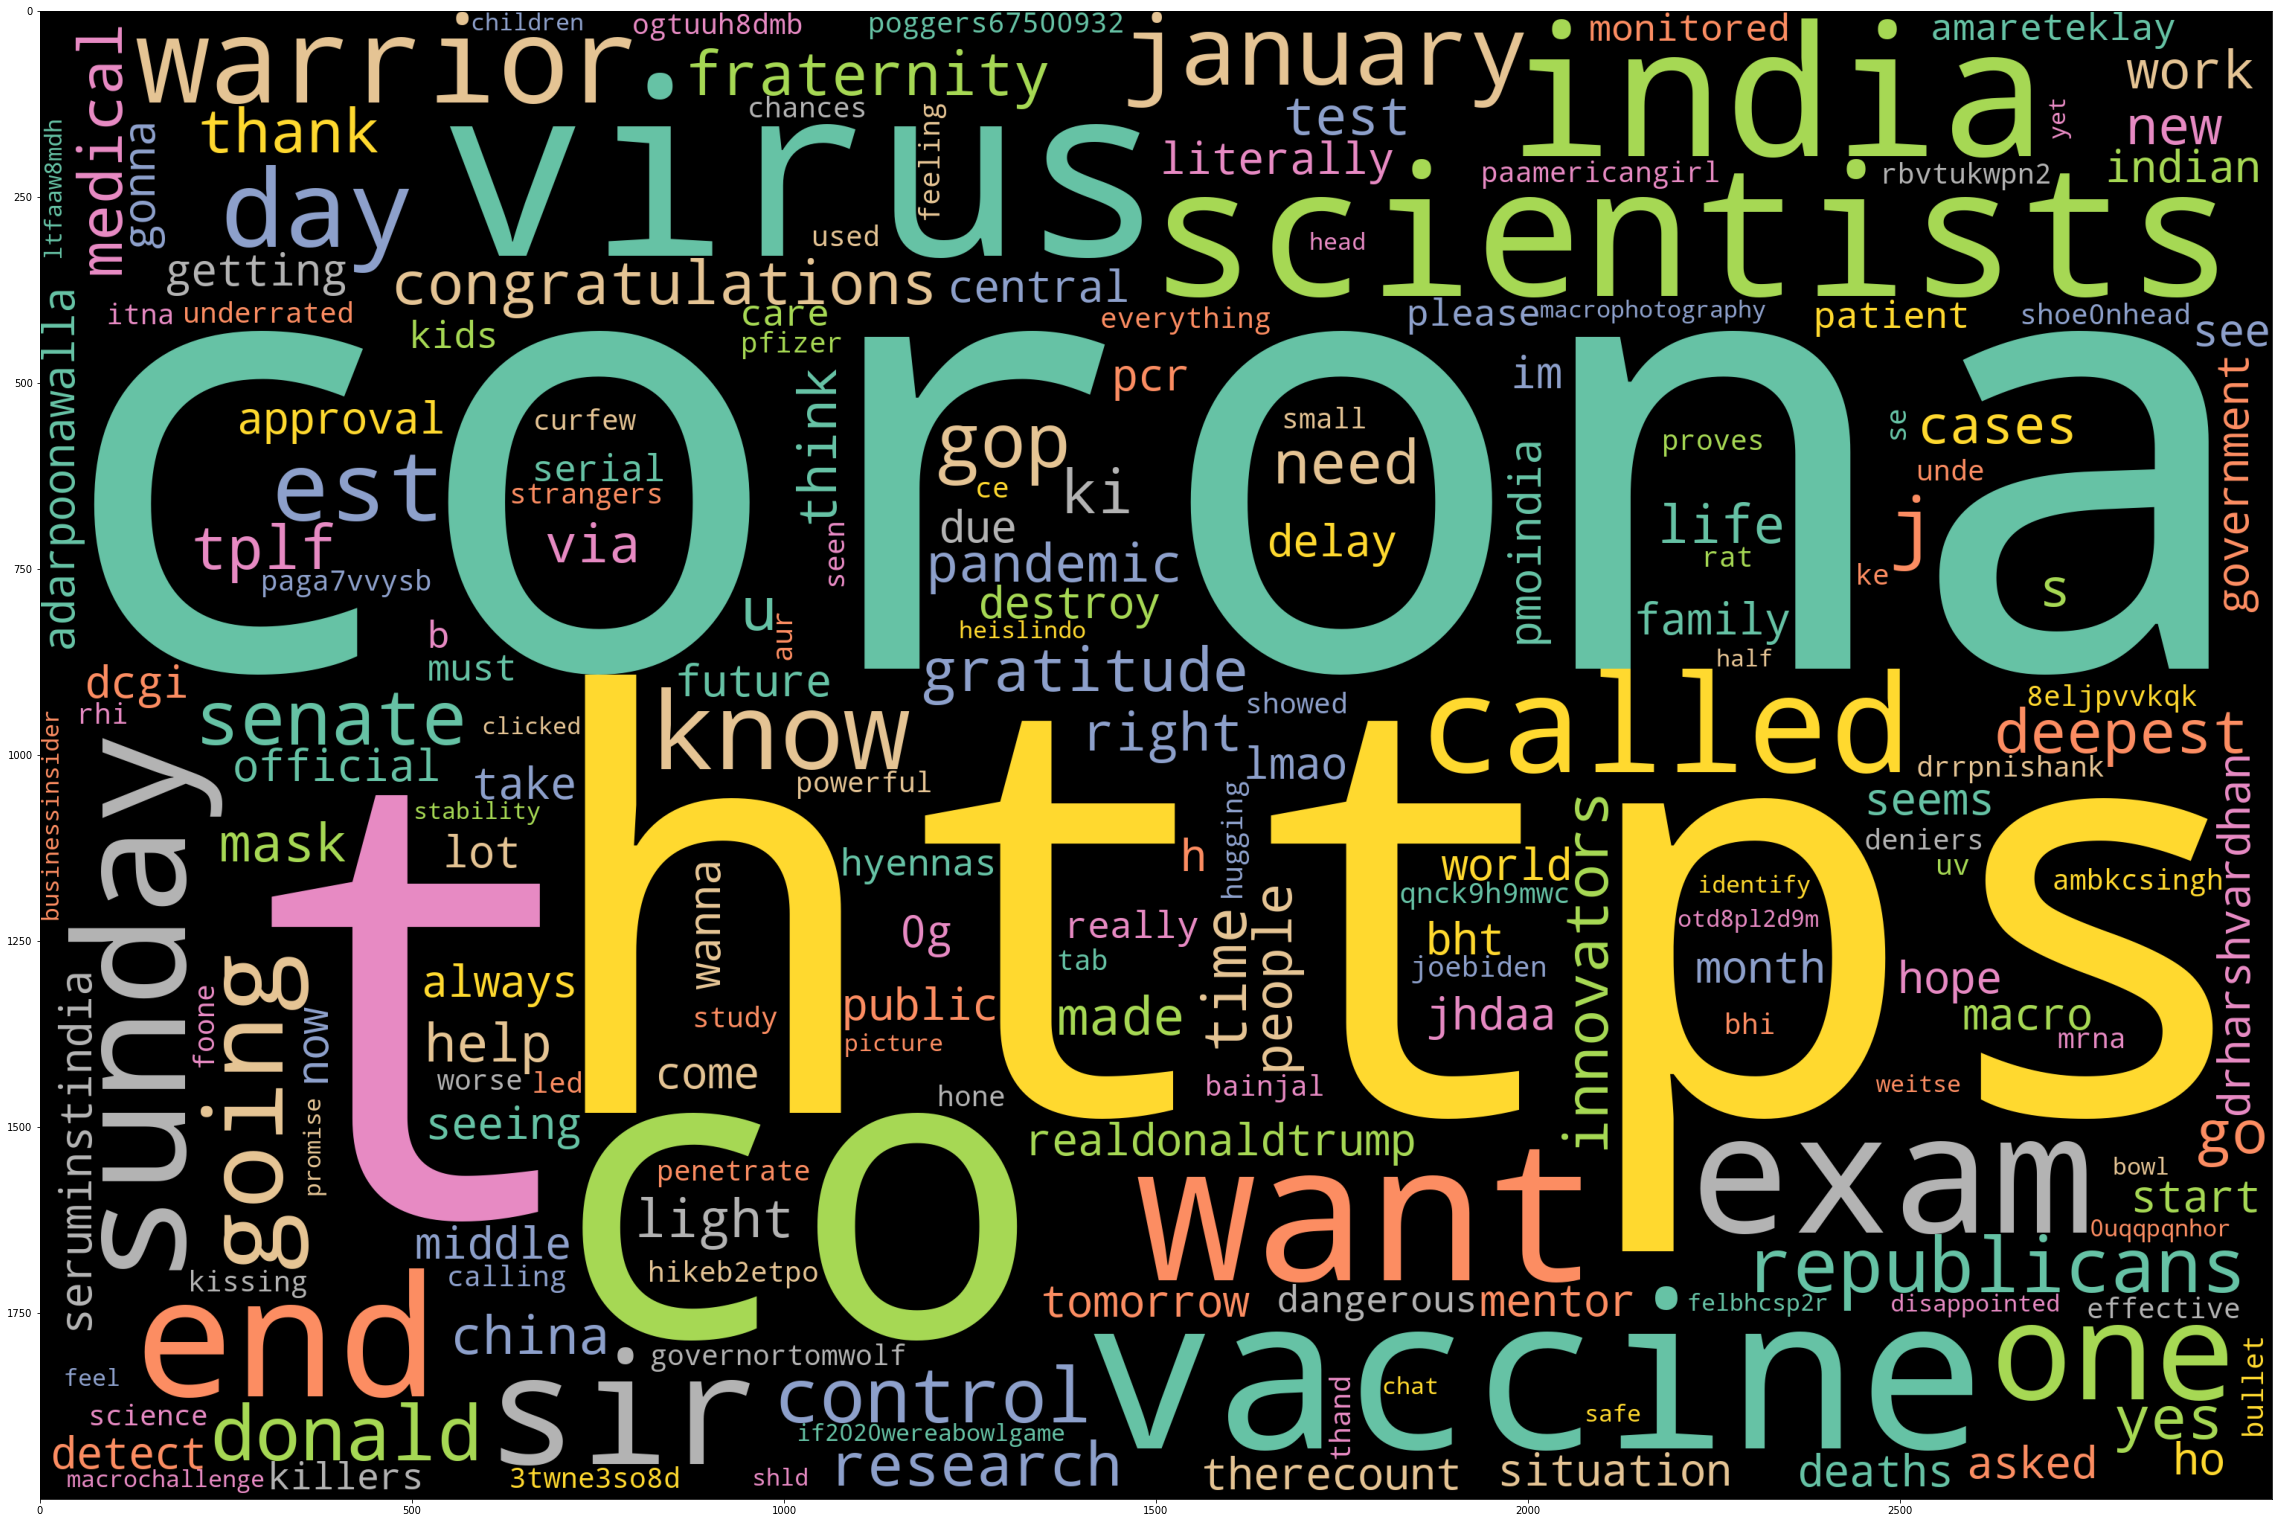

In [20]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
text = " ".join(all_words)

# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Set figure size
plt.figure(figsize=(40, 30))
#Display image
plt.imshow(wordcloud)


In [ ]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in words_cleaned]

# View bigrams for the first tweet
terms_bigram[0]

# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

In [ ]:
#For streaming recent tweets
class MyStreamListener(StreamListener):

    def on_status(self, status):
        print(status.text)
        
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
myStream.filter(track=['python'])

In [ ]:
tweet.entities

In [ ]:
import pandas as pd
df = pd.DataFrame(data = tweet._json)

In [ ]:
df[['user','text']].head()

In [ ]:
df.columns